# **Actividad 4:** Mapas de calor y boxplots
### Integrantes:

*   Tania Regina Ramírez Vázquez - A01654087
*   Juan Antonio Mancera Velasco - A01662634
*   Owen Rosales Castro - A01660320

## Importación de librerías

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

#Carga de datos


In [ ]:
df = pd.read_csv("covid19_tweets.csv")
df

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74431,Laura Wolfrom,"Lexington, KY",The only things I collect are memories.,2010-09-24 02:01:15,85,586,1902,False,2020-08-04 03:13:29,So far this summer I have filled up my lawn mo...,"['COVID19', 'QuarantineLife']",Twitter for iPhone,False
74432,Professor Tonya M. Evans,😷 #stayathome,Law Prof @DickinsonLaw & Entrepreneur | Crypto...,2013-05-14 20:15:24,4289,1066,53569,False,2020-08-04 03:13:26,"ICYMI: REPLAY: #TechIntersect🧩 #16: Isaiah ""@B...","['TechIntersect', 'Bitcoin', 'COVID19']",Twitter Web App,False
74433,People's Daily app,"北京, 中华人民共和国",Our mission is to provide news and perspective...,2018-02-04 12:36:42,1413,102,16,False,2020-08-04 03:13:22,Community workers in Tianshan District of Urum...,"['China', 'Xinjiang']",Twitter Web App,False
74434,M0ser,NaN,Reagan conservative and attorney raised in the...,2014-02-18 03:46:28,2554,1733,129104,False,2020-08-04 03:13:19,If only we had a responsible media to warn us ...,['COVID19'],Twitter for iPhone,False


#Tabla de correlación de datos

In [ ]:
df.corr()

<ipython-input-26-616d89d74c02>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  datos.corr()


,user_followers,user_friends,user_favourites,user_verified,is_retweet
user_followers,1.000000,-0.002722,-0.028724,0.322896,NaN
user_friends,-0.002722,1.000000,0.207825,0.013099,NaN
user_favourites,-0.028724,0.207825,1.000000,-0.060316,NaN
user_verified,0.322896,0.013099,-0.060316,1.000000,NaN
is_retweet,NaN,NaN,NaN,NaN,NaN


#Gráficas de histograma, cajas y bigotes, y scatter

Para graficar, se iterará cada columna del archivo para extraer los datos de este y asignarlos a un eje X y Y.

La columna user_location no contiene datos numéricos. No se generaron gráficos para esta columna.
La columna user_description no contiene datos numéricos. No se generaron gráficos para esta columna.
La columna user_created no contiene datos numéricos. No se generaron gráficos para esta columna.
La columna user_verified no contiene datos numéricos. No se generaron gráficos para esta columna.
La columna date no contiene datos numéricos. No se generaron gráficos para esta columna.
La columna text no contiene datos numéricos. No se generaron gráficos para esta columna.
La columna hashtags no contiene datos numéricos. No se generaron gráficos para esta columna.
La columna source no contiene datos numéricos. No se generaron gráficos para esta columna.
La columna is_retweet no contiene datos numéricos. No se generaron gráficos para esta columna.


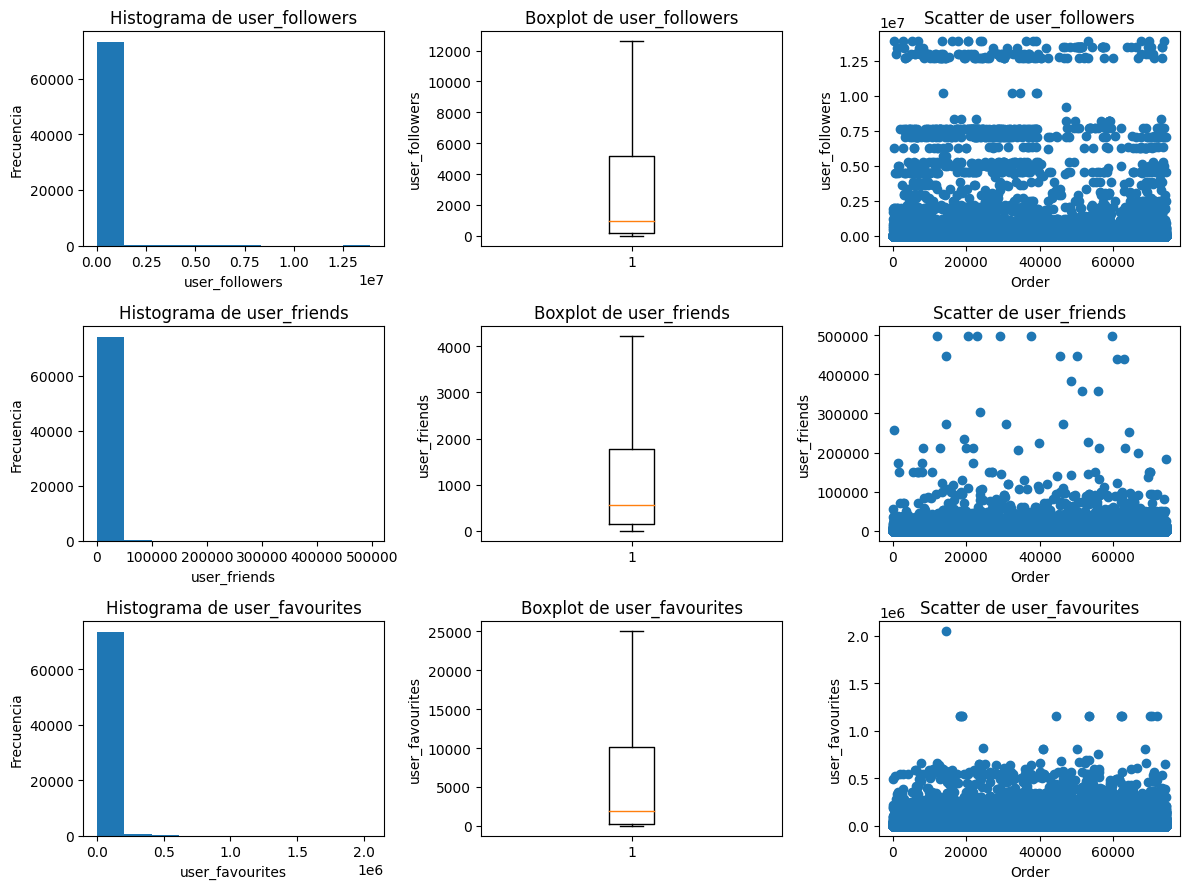

In [29]:
plt.figure(figsize=(12, 9))

n = 1
for col in df.columns:
    # Verificar si la columna contiene datos numéricos
    if np.issubdtype(df[col].dtype, np.number):
        y = df[col]
        order = range(len(y))

        # Histograma
        plt.subplot(3, 3, n)
        plt.title(f"Histograma de {col}")
        plt.xlabel(f"{col}")
        plt.ylabel("Frecuencia")
        plt.hist(y)
        n += 1

        # Boxplot
        plt.subplot(3, 3, n)
        plt.title(f"Boxplot de {col}")
        plt.ylabel(f"{col}")
        plt.boxplot(y, showfliers=False)
        n += 1

        # Scatter
        plt.subplot(3, 3, n)
        plt.title(f"Scatter de {col}")
        plt.xlabel("Order")
        plt.ylabel(f"{col}")
        plt.scatter(order, y)
        n += 1
    else:
        print(f"La columna {col} no contiene datos numéricos. No se generaron gráficos para esta columna.")

plt.tight_layout()
plt.show()


## Mapa de calor

<ipython-input-28-4a6e35e67a58>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(datos.corr())


<Axes: >

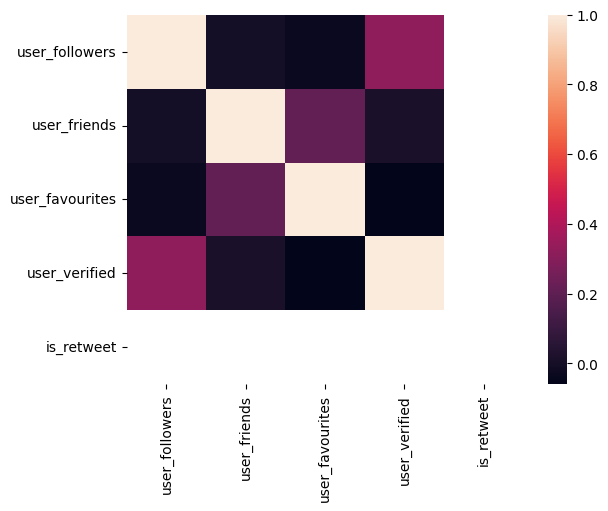

In [ ]:
sns.heatmap(df.corr())

## ¿Hay alguna variable que no aporta información?

En teoría todas las variables son útiles para algún tipo de análisis, sin embargo, para este caso en particular aquellas variables con contenido en formato de texto no nos aportan información para hacer un análisis estadístico de los datos.

## Si tuvieras que eliminar variables, ¿cuáles quitarías y por qué?

Removeríamos variables con tipo de dato objeto y boolanos, ya que, al no ser tipos de datos numéricos no nos permitirían realizar algún cálculo o estadística.

In [30]:
tiposVariables = df.dtypes
print(tiposVariables)

user_location       object
user_description    object
user_created        object
user_followers       int64
user_friends         int64
user_favourites      int64
user_verified         bool
date                object
text                object
hashtags            object
source              object
is_retweet            bool
dtype: object


## ¿Existen variables que tengan datos extraños?

La variable de text, location, description, source y date, contienen valores adicionales que podrían causar malinterpretaciones de los datos, como los emojis en el texto u otros símbolos.

## Si comparas las variables, ¿todas están en rangos similares? ¿Crees que esto afecte?

Sí se nota una variación en los datos, sobre todo en las gráficas de scatter es más notoria la variación de la información y como siguen tendencias de agrupación por bloques.

## ¿Puedes encontrar grupos qué se parezcan? ¿Qué grupos son estos?

En user_followers podemos observar como se generan 3 grupos, uno al inferior de la gráfica, uno en el medio y otro en el extremo opuesto, de cierta forma estos grupos se parecen ya que se nota una segmentación entre ellos.
Así mismo, en user_favourites podemos ver como los datos se agrupan de una forma más clara en un solo grupo, dejando solo un par de outliers.